# What this file does

I didn't end up using this, but I was looking at money in and out of NFIP by community. I wrote to FEMA with my findings here, and I am reasonably certain that Total Premium - Total Dollars Paid is the way to assess what I am looking at. Although it could not be more confusingly worded from FEMA.

"For losses, this is an historic analysis of the program since 1978. The total amount paid in flood claims, is for the individual policyholders that have flood insurance policies.  This is about 5.1 million policies (Total Policy Count - Column I). This is the total number of policies in force which includes both structure and contents  coverage policies. The total amount in policy payments for one year of coverage is $3.62 trillion (Total Premium and PFP - Column F)." - FEMA Spokesperson

My only concern here is that the sum of Total Premium and PFP in my dataset is not 3.62 trillion, so I'm not convinced that this is coverage for a single year. I've sent a follow up email but I haven't yet heard back. I'm also not clear about whether dollars paid is also historical or not.

# Have communities put in as much as they have taken out?

In [42]:
import pandas as pd

In [59]:
import matplotlib.pyplot as plt

In [43]:
df = pd.read_excel('PolicyandLossDatabyGeography.xlsx - Policy and Loss by Geography.xlsx')

In [44]:
df.dtypes

State                              object
Community Name (Number)            object
County                             object
Direct Premium and FPF              int64
WYO Premium and FPF                 int64
Total Premium and FPF               int64
Direct Policy Count                 int64
WYO Policy Count                    int64
Total Policy Count                  int64
Direct Coverage (in Thousands)    float64
WYO Coverage (in Thousands)       float64
Total Coverage (in Thousands)     float64
Direct Losses                       int64
WYO Losses                          int64
Total Losses                      float64
Direct Dollars Paid               float64
WYO Dollars Paid                  float64
Total Dollars Paid                float64
Adjuster Expense                  float64
dtype: object

In [73]:
df['Total Premium and FPF'].sum()

7243476758

In [74]:
df['Total Dollars Paid'].sum()

139692697894.06073

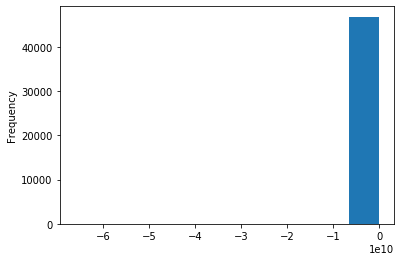

In [45]:
df['diff'] = df['Total Premium and FPF'] - df['Total Dollars Paid']
df['diff'].plot(kind='hist')

Adjuster Expense	The total amount paid to adjusters for all claims within the community and/or county. It includes all special expenses, allocated loss adjusted expense, and allocated ICC expense.
Building Coverage	Building coverage for a policy or claim (whole dollars)
Building Payments	The total amount paid for all losses for building,
Community Name	The official NFIP name of the community in which the claim or policy exists.
Community Number	The 6 character community ID in which the claim or policy exists.
Contents Coverage	Contents coverage for a policy or claim (whole dollars)
Contents Payments	The total amount paid for all losses for contents
County Name	The official FIPS county name for the claim or policy. It is determined by geocoding of the policy or claim address, rather than the historical method of using the community to look up the county.
Data as of Date	The date of the most recent validated data upon which the report is based.
ICC Coverage	ICC coverage for a policy or claim (whole dollars)
ICC Payments	The total amount paid for all losses for ICC
Number of Losses	The number of losses (claims) reported within that community and/or county.
State	The state in which the policy or claim exists. The value is determined by the geocoded data first, and in the absence of geocoding, by the community state.
Total Policy Count	The total number of policies reported within the community and/or county in force as of the given date. All condo units are counted for each condo master policy.
Total Premium and Policy Fee	The policy premium and associated policy fee for the policies.
WYO or Direct	An indicator of whether the policy or claim is administered by NFIP Direct ("Direct") or a Write-Your-Own Company ("WYO")

In [20]:
df_jersey = df[df['State']=='NEW JERSEY']

In [46]:
df_jersey['diff'] = df_jersey['Total Premium and FPF'] - df_jersey['Total Dollars Paid']

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
df_jersey['diff']

17417          0.00
17418   -2849282.77
17419      -2959.10
17420   -4479011.55
17421     -47828.23
            ...    
18878     -26902.00
18879       -619.18
18880       2380.00
18881     -15631.58
18882    -170359.74
Name: diff, Length: 1466, dtype: float64

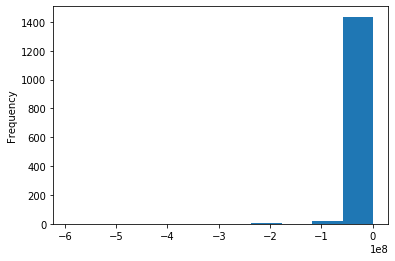

In [48]:
df_jersey['diff'].plot(kind='hist')


In [50]:
len(df_jersey)

1466

In [49]:
df_jersey[df_jersey['diff']>0]

,State,Community Name (Number),County,Direct Premium and FPF,WYO Premium and FPF,Total Premium and FPF,Direct Policy Count,WYO Policy Count,Total Policy Count,Direct Coverage (in Thousands),WYO Coverage (in Thousands),Total Coverage (in Thousands),Direct Losses,WYO Losses,Total Losses,Direct Dollars Paid,WYO Dollars Paid,Total Dollars Paid,Adjuster Expense,diff
17430,NEW JERSEY,"ALLENTOWN, BOROUGH OF (340284)",MONMOUTH COUNTY,0,12805,12805,0,14,14,0.0,4195.5,4195.5,0,3,3.0,0.0,10865.75,10865.75,4131.00,1939.25
17432,NEW JERSEY,"ALLOWAY, TOWNSHIP OF (340413)",SALEM COUNTY,0,2722,2722,0,5,5,0.0,1425.0,1425.0,2,1,3.0,0.0,0.00,0.00,288.85,2722.00
17434,NEW JERSEY,"ANDOVER, BOROUGH OF (340542)",SUSSEX COUNTY,5794,1809,7603,1,2,3,250.0,250.0,500.0,0,1,1.0,0.0,4313.60,4313.60,800.00,3289.40
17435,NEW JERSEY,"ANDOVER, TOWNSHIP OF (340527)",SUSSEX COUNTY,705,1654,2359,2,4,6,525.0,1120.0,1645.0,0,2,2.0,0.0,303.65,303.65,825.00,2055.35
17464,NEW JERSEY,"AVON-BY-THE-SEA, BOROUGH OF (340287)",OCEAN COUNTY,0,810,810,0,1,1,0.0,40.0,40.0,0,0,NaN,0.0,0.00,0.00,0.00,810.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,NEW JERSEY,"WOODBINE, BOROUGH OF (340164)",CAPE MAY COUNTY,0,2117,2117,0,6,6,0.0,1470.0,1470.0,0,0,NaN,0.0,0.00,0.00,0.00,2117.00
18862,NEW JERSEY,"WOODBRIDGE, TOWNSHIP OF (345331)",BERGEN COUNTY,0,677,677,0,1,1,0.0,500.0,500.0,0,0,NaN,0.0,0.00,0.00,0.00,677.00
18871,NEW JERSEY,"WOODLAND, TOWNSHIP OF (340551)",BURLINGTON COUNTY,0,3650,3650,0,3,3,0.0,748.0,748.0,0,0,NaN,0.0,0.00,0.00,0.00,3650.00
18877,NEW JERSEY,"WOODSTOWN, BOROUGH OF (340426)",SALEM COUNTY,467,5636,6103,1,14,15,280.0,3248.0,3528.0,1,1,2.0,0.0,3281.48,3281.48,475.00,2821.52


In [41]:
df_jersey[df_jersey['diff']>0].describe

<bound method NDFrame.describe of             State               Community Name (Number)             County  \
17432  NEW JERSEY         ALLOWAY, TOWNSHIP OF (340413)       SALEM COUNTY   
17435  NEW JERSEY         ANDOVER, TOWNSHIP OF (340527)      SUSSEX COUNTY   
17464  NEW JERSEY  AVON-BY-THE-SEA, BOROUGH OF (340287)       OCEAN COUNTY   
17487  NEW JERSEY             BAYONNE, CITY OF (340218)     PASSAIC COUNTY   
17491  NEW JERSEY      BEACH HAVEN, BOROUGH OF (345282)  GLOUCESTER COUNTY   
...           ...                                   ...                ...   
18861  NEW JERSEY         WOODBINE, BOROUGH OF (340164)    CAPE MAY COUNTY   
18862  NEW JERSEY      WOODBRIDGE, TOWNSHIP OF (345331)      BERGEN COUNTY   
18871  NEW JERSEY        WOODLAND, TOWNSHIP OF (340551)  BURLINGTON COUNTY   
18877  NEW JERSEY        WOODSTOWN, BOROUGH OF (340426)       SALEM COUNTY   
18880  NEW JERSEY      WRIGHTSTOWN, BOROUGH OF (340120)  BURLINGTON COUNTY   

       Direct Premium and FPF

In [57]:
df_avalon = df_jersey[df_jersey['Community Name (Number)']=='AVALON, BOROUGH OF (345279)']
df_avalon['diff'] = df_avalon['Total Premium and FPF'] - df_avalon['Total Dollars Paid']
df_avalon[df_avalon['County']=='CAPE MAY COUNTY']['diff']


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


17458   -23237734.4
Name: diff, dtype: float64

In [72]:
df_avalon[df_avalon['County']=='CAPE MAY COUNTY']

,State,Community Name (Number),County,Direct Premium and FPF,WYO Premium and FPF,Total Premium and FPF,Direct Policy Count,WYO Policy Count,Total Policy Count,Direct Coverage (in Thousands),WYO Coverage (in Thousands),Total Coverage (in Thousands),Direct Losses,WYO Losses,Total Losses,Direct Dollars Paid,WYO Dollars Paid,Total Dollars Paid,Adjuster Expense,diff
17458,NEW JERSEY,"AVALON, BOROUGH OF (345279)",CAPE MAY COUNTY,233467,3288433,3521900,211,4829,5040,57214.8,1322712.4,1379927.2,693,1573,2266.0,6614800.47,20144833.93,26759634.4,1821192.82,-23237734.4


In [65]:
df_jersey['diff'].median()

-20905.14

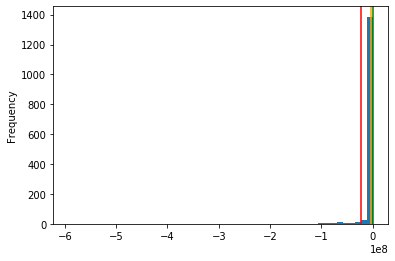

In [71]:
df_jersey['diff'].plot(kind='hist', bins=50)
plt.axvline(x=-23237734.4, color='red')
plt.axvline(x=df_jersey['diff'].mean(), color='orange')
plt.axvline(x=df_jersey['diff'].median(), color='green')

In [77]:
df_avalon[df_avalon['County']=='CAPE MAY COUNTY']['Total Dollars Paid']

17458    26759634.4
Name: Total Dollars Paid, dtype: float64

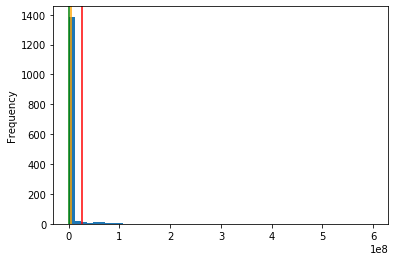

In [78]:
df_jersey['Total Dollars Paid'].plot(kind='hist', bins=50)
plt.axvline(x=26759634.4, color='red')
plt.axvline(x=df_jersey['Total Dollars Paid'].mean(), color='orange')
plt.axvline(x=df_jersey['Total Dollars Paid'].median(), color='green')

In [81]:
df_jersey['Total Premium and FPF'].mean()

144279.3540245566

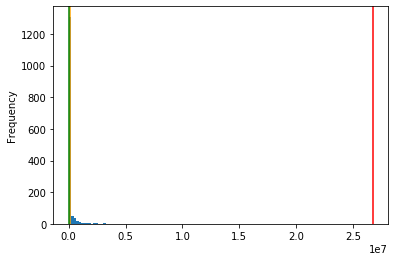

In [80]:
df_jersey['Total Premium and FPF'].plot(kind='hist', bins=50)
plt.axvline(x=26759634.4, color='red')
plt.axvline(x=df_jersey['Total Premium and FPF'].mean(), color='orange')
plt.axvline(x=df_jersey['Total Premium and FPF'].median(), color='green')

In [37]:
df_jersey[df_jersey['Community Name (Number)']=='LITTLE EGG HARBOR, TOWNSHIP OF (340380)']




,State,Community Name (Number),County,Direct Premium and FPF,WYO Premium and FPF,Total Premium and FPF,Direct Policy Count,WYO Policy Count,Total Policy Count,Direct Coverage (in Thousands),WYO Coverage (in Thousands),Total Coverage (in Thousands),Direct Losses,WYO Losses,Total Losses,Direct Dollars Paid,WYO Dollars Paid,Total Dollars Paid,Adjuster Expense,diff
18040,NEW JERSEY,"LITTLE EGG HARBOR, TOWNSHIP OF (340380)",ATLANTIC COUNTY,0,0,0,0,0,0,0.0,0.0,0.0,5,6,11.0,15700.35,1.014017e+05,1.171021e+05,5373.00,-1.171021e+05
18041,NEW JERSEY,"LITTLE EGG HARBOR, TOWNSHIP OF (340380)",BERGEN COUNTY,0,0,0,0,0,0,0.0,0.0,0.0,3,0,3.0,555.25,0.000000e+00,5.552500e+02,332.19,-5.552500e+02
18042,NEW JERSEY,"LITTLE EGG HARBOR, TOWNSHIP OF (340380)",BURLINGTON COUNTY,0,2424,2424,0,1,1,0.0,146.2,146.2,2,2,4.0,3900.00,6.865569e+04,7.255569e+04,4413.55,-7.240949e+04
18043,NEW JERSEY,"LITTLE EGG HARBOR, TOWNSHIP OF (340380)",CAMDEN COUNTY,0,0,0,0,0,0,0.0,0.0,0.0,1,1,2.0,0.00,1.112817e+04,1.112817e+04,598.20,-1.112817e+04
18044,NEW JERSEY,"LITTLE EGG HARBOR, TOWNSHIP OF (340380)",CAPE MAY COUNTY,0,0,0,0,0,0,0.0,0.0,0.0,3,2,5.0,24320.14,3.323206e+04,5.755220e+04,2450.66,-5.755220e+04
18045,NEW JERSEY,"LITTLE EGG HARBOR, TOWNSHIP OF (340380)",ESSEX COUNTY,0,0,0,0,0,0,0.0,0.0,0.0,2,1,3.0,0.00,6.621497e+04,6.621497e+04,2902.94,-6.621497e+04
18046,NEW JERSEY,"LITTLE EGG HARBOR, TOWNSHIP OF (340380)",GLOUCESTER COUNTY,0,0,0,0,0,0,0.0,0.0,0.0,2,0,2.0,24760.42,0.000000e+00,2.476042e+04,1842.90,-2.476042e+04
18047,NEW JERSEY,"LITTLE EGG HARBOR, TOWNSHIP OF (340380)",HUDSON COUNTY,0,0,0,0,0,0,0.0,0.0,0.0,1,0,1.0,730.00,0.000000e+00,7.300000e+02,451.45,-7.300000e+02
18048,NEW JERSEY,"LITTLE EGG HARBOR, TOWNSHIP OF (340380)",MERCER COUNTY,0,0,0,0,0,0,0.0,0.0,0.0,0,1,1.0,0.00,0.000000e+00,0.000000e+00,70.00,0.000000e+00
18049,NEW JERSEY,"LITTLE EGG HARBOR, TOWNSHIP OF (340380)",OCEAN COUNTY,193871,1816108,2009979,208,2211,2419,44281.1,511486.7,555767.8,686,3390,4076.0,27356355.25,1.750376e+08,2.023940e+08,10722749.33,-2.018382e+08


In [38]:
df_jersey[df_jersey['Community Name (Number)']=='LITTLE EGG HARBOR, TOWNSHIP OF (340380)']





,State,Community Name (Number),County,Direct Premium and FPF,WYO Premium and FPF,Total Premium and FPF,Direct Policy Count,WYO Policy Count,Total Policy Count,Direct Coverage (in Thousands),WYO Coverage (in Thousands),Total Coverage (in Thousands),Direct Losses,WYO Losses,Total Losses,Direct Dollars Paid,WYO Dollars Paid,Total Dollars Paid,Adjuster Expense,diff
18040,NEW JERSEY,"LITTLE EGG HARBOR, TOWNSHIP OF (340380)",ATLANTIC COUNTY,0,0,0,0,0,0,0.0,0.0,0.0,5,6,11.0,15700.35,1.014017e+05,1.171021e+05,5373.00,-1.171021e+05
18041,NEW JERSEY,"LITTLE EGG HARBOR, TOWNSHIP OF (340380)",BERGEN COUNTY,0,0,0,0,0,0,0.0,0.0,0.0,3,0,3.0,555.25,0.000000e+00,5.552500e+02,332.19,-5.552500e+02
18042,NEW JERSEY,"LITTLE EGG HARBOR, TOWNSHIP OF (340380)",BURLINGTON COUNTY,0,2424,2424,0,1,1,0.0,146.2,146.2,2,2,4.0,3900.00,6.865569e+04,7.255569e+04,4413.55,-7.240949e+04
18043,NEW JERSEY,"LITTLE EGG HARBOR, TOWNSHIP OF (340380)",CAMDEN COUNTY,0,0,0,0,0,0,0.0,0.0,0.0,1,1,2.0,0.00,1.112817e+04,1.112817e+04,598.20,-1.112817e+04
18044,NEW JERSEY,"LITTLE EGG HARBOR, TOWNSHIP OF (340380)",CAPE MAY COUNTY,0,0,0,0,0,0,0.0,0.0,0.0,3,2,5.0,24320.14,3.323206e+04,5.755220e+04,2450.66,-5.755220e+04
18045,NEW JERSEY,"LITTLE EGG HARBOR, TOWNSHIP OF (340380)",ESSEX COUNTY,0,0,0,0,0,0,0.0,0.0,0.0,2,1,3.0,0.00,6.621497e+04,6.621497e+04,2902.94,-6.621497e+04
18046,NEW JERSEY,"LITTLE EGG HARBOR, TOWNSHIP OF (340380)",GLOUCESTER COUNTY,0,0,0,0,0,0,0.0,0.0,0.0,2,0,2.0,24760.42,0.000000e+00,2.476042e+04,1842.90,-2.476042e+04
18047,NEW JERSEY,"LITTLE EGG HARBOR, TOWNSHIP OF (340380)",HUDSON COUNTY,0,0,0,0,0,0,0.0,0.0,0.0,1,0,1.0,730.00,0.000000e+00,7.300000e+02,451.45,-7.300000e+02
18048,NEW JERSEY,"LITTLE EGG HARBOR, TOWNSHIP OF (340380)",MERCER COUNTY,0,0,0,0,0,0,0.0,0.0,0.0,0,1,1.0,0.00,0.000000e+00,0.000000e+00,70.00,0.000000e+00
18049,NEW JERSEY,"LITTLE EGG HARBOR, TOWNSHIP OF (340380)",OCEAN COUNTY,193871,1816108,2009979,208,2211,2419,44281.1,511486.7,555767.8,686,3390,4076.0,27356355.25,1.750376e+08,2.023940e+08,10722749.33,-2.018382e+08
